In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

DATASET_PATH = 'train.csv'

In [2]:
df = pd.read_csv(DATASET_PATH, index_col='Id')
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [4]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
df.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [6]:
df = df.drop(['Ecology_2', 'Ecology_3'], axis=1)

In [7]:
df['Helthcare_2'].value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

In [8]:
df = pd.get_dummies(df)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   5202 non-null   float64
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Price          10000 non-null  float64
 16  Shops_2_A      10000 non-null  uint8  
 17  Shops_2_B      10000 non-null  uint8  
dtypes: 

In [10]:
df['Helthcare_2'] = df['Helthcare_2'].astype('category')
df = pd.get_dummies(df)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Price,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,...,184966.930730,0,1,1,0,0,0,0,0,0
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,...,300009.450063,0,1,0,1,0,0,0,0,0
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,...,220925.908524,0,1,0,1,0,0,0,0,0
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,...,175616.227217,0,1,1,0,0,0,0,0,0
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,...,150226.531644,0,1,0,0,1,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   5202 non-null   float64
 13  Shops_1        10000 non-null  int64  
 14  Price          10000 non-null  float64
 15  Shops_2_A      10000 non-null  uint8  
 16  Shops_2_B      10000 non-null  uint8  
 17  Helthcare_2_0  10000 non-null  uint8  
 18  Hel

In [12]:
df.groupby(['KitchenSquare', 'Square'])['LifeSquare'].median().head()

KitchenSquare  Square   
0.0            2.377248      0.873147
               4.823679     79.767964
               16.117154     8.822988
               17.498542    13.446544
               19.927423    15.541536
Name: LifeSquare, dtype: float64

In [13]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Shops_1,Price,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
DistrictId,1.00,0.07,-0.03,-0.02,0.04,-0.12,-0.15,0.01,0.07,0.25,0.17,0.14,0.30,0.17,0.27,0.02,-0.02,-0.32,0.03,0.09,0.24,0.13,0.03,0.02
Rooms,0.07,1.00,0.66,0.13,0.01,-0.00,-0.03,-0.01,-0.03,0.08,0.07,0.01,0.04,0.05,0.55,0.00,-0.00,-0.08,0.05,0.02,0.01,0.04,0.02,0.01
Square,-0.03,0.66,1.00,0.20,0.01,0.11,0.08,-0.01,-0.06,-0.07,-0.04,0.04,-0.04,0.02,0.52,0.05,-0.05,0.05,-0.04,-0.00,-0.04,-0.01,0.01,0.03
LifeSquare,-0.02,0.13,0.20,1.00,-0.00,0.02,0.03,-0.00,-0.02,-0.05,-0.04,0.01,-0.03,-0.01,0.08,0.00,-0.00,0.04,-0.02,-0.01,-0.01,-0.01,-0.01,0.00
KitchenSquare,0.04,0.01,0.01,-0.00,1.00,-0.01,0.00,0.00,-0.01,0.04,0.04,-0.02,0.01,0.01,0.03,0.02,-0.02,-0.04,0.02,0.00,-0.00,0.01,0.01,0.07
Floor,-0.12,-0.00,0.11,0.02,-0.01,1.00,0.42,0.00,-0.02,-0.04,-0.02,-0.00,-0.14,0.02,0.13,0.01,-0.01,0.06,0.00,-0.04,-0.02,-0.06,0.01,-0.03
HouseFloor,-0.15,-0.03,0.08,0.03,0.00,0.42,1.00,-0.00,-0.00,-0.02,0.01,-0.01,-0.14,0.03,0.09,-0.05,0.05,0.06,0.01,-0.03,-0.05,-0.04,0.03,-0.04
HouseYear,0.01,-0.01,-0.01,-0.00,0.00,0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,-0.00,0.00,-0.01,-0.01,-0.00,0.02,-0.00,-0.00,-0.00
Ecology_1,0.07,-0.03,-0.06,-0.02,-0.01,-0.02,-0.00,0.00,1.00,0.03,0.01,-0.12,-0.04,-0.08,-0.06,-0.08,0.08,-0.01,-0.08,0.07,0.05,0.04,0.01,-0.09
Social_1,0.25,0.08,-0.07,-0.05,0.04,-0.04,-0.02,0.00,0.03,1.00,0.96,0.02,0.08,0.53,0.26,-0.14,0.14,-0.67,0.36,0.12,0.23,0.01,0.29,0.03


In [14]:
# df.loc[df['LifeSquare'].isna(), 'LifeSquare'] =\
# df.groupby(['Rooms', 'Square'])['LifeSquare'].transform(lambda x: x.median())
# df['LifeSquare'].describe()

df["LifeSquare"].fillna(df["LifeSquare"].mean(), inplace=True)
df["Healthcare_1"].fillna(df["Healthcare_1"].mean(), inplace=True)

In [15]:
target = "Price"

y = df[target]
X = df.drop(target, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14604 to 2135
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     7000 non-null   int64  
 1   Rooms          7000 non-null   float64
 2   Square         7000 non-null   float64
 3   LifeSquare     7000 non-null   float64
 4   KitchenSquare  7000 non-null   float64
 5   Floor          7000 non-null   int64  
 6   HouseFloor     7000 non-null   float64
 7   HouseYear      7000 non-null   int64  
 8   Ecology_1      7000 non-null   float64
 9   Social_1       7000 non-null   int64  
 10  Social_2       7000 non-null   int64  
 11  Social_3       7000 non-null   int64  
 12  Healthcare_1   7000 non-null   float64
 13  Shops_1        7000 non-null   int64  
 14  Shops_2_A      7000 non-null   uint8  
 15  Shops_2_B      7000 non-null   uint8  
 16  Helthcare_2_0  7000 non-null   uint8  
 17  Helthcare_2_1  7000 non-null   uint8  
 18  Helt

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                        columns=X_train.columns, 
                        index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                        columns=X_test.columns, 
                        index=X_test.index)

features = X_train_scaled.describe().T
features

,count,mean,std,min,25%,50%,75%,max
DistrictId,7000.0,-6.597897e-17,1.000071,-1.155913,-0.721539,-0.310026,0.558723,3.622207
Rooms,7000.0,7.536828e-17,1.000071,-2.240998,-1.054837,0.131325,0.131325,20.296074
Square,7000.0,-2.283887e-18,1.000071,-2.629973,-0.710171,-0.179159,0.471746,26.743316
LifeSquare,7000.0,-9.034043e-17,1.000071,-0.409388,-0.131403,-0.002814,0.043521,82.168387
KitchenSquare,7000.0,0.000000e+00,1.000071,-0.190919,-0.161504,-0.014434,0.073808,59.049107
Floor,7000.0,8.425007e-17,1.000071,-1.440399,-0.865870,-0.291341,0.666207,6.411496
HouseFloor,7000.0,1.035362e-16,1.000071,-1.847149,-0.533446,0.196388,0.634289,15.230979
HouseYear,7000.0,4.060244e-18,1.000071,-0.012259,-0.012000,-0.011988,-0.011888,83.660025
Ecology_1,7000.0,-3.451208e-17,1.000071,-0.993666,-0.844860,-0.357667,0.646336,3.406901
Social_1,7000.0,-2.131628e-17,1.000071,-1.408638,-1.067393,0.013219,0.638837,2.800060


In [18]:
from sklearn.metrics import r2_score

In [19]:
from sklearn.linear_model           import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
print("LinearRegression")
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred))


LinearRegression
0.46736741273734916


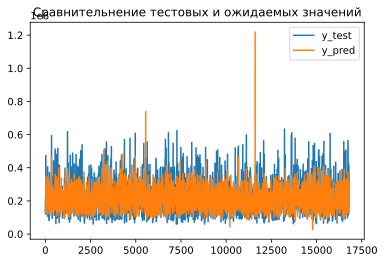

In [20]:
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.flatten(),
})
lr_sort_check_test = check_test.sort_index()

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(lr_sort_check_test.y_test, label='y_test')
ax.plot(lr_sort_check_test.y_pred, label='y_pred')
ax.legend()
ax.set(title='Сравнительнение тестовых и ожидаемых значений');

In [21]:
print("LinearRegression")
from sklearn.linear_model           import LinearRegression

clf = LinearRegression()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(r2_score(y_test, y_pred))

LinearRegression
0.46724678367477146


In [22]:
df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Shops_1            int64
Price            float64
Shops_2_A          uint8
Shops_2_B          uint8
Helthcare_2_0      uint8
Helthcare_2_1      uint8
Helthcare_2_2      uint8
Helthcare_2_3      uint8
Helthcare_2_4      uint8
Helthcare_2_5      uint8
Helthcare_2_6      uint8
dtype: object

In [23]:
df_cat = df.astype('category')
df_cat.dtypes

DistrictId       category
Rooms            category
Square           category
LifeSquare       category
KitchenSquare    category
Floor            category
HouseFloor       category
HouseYear        category
Ecology_1        category
Social_1         category
Social_2         category
Social_3         category
Healthcare_1     category
Shops_1          category
Price            category
Shops_2_A        category
Shops_2_B        category
Helthcare_2_0    category
Helthcare_2_1    category
Helthcare_2_2    category
Helthcare_2_3    category
Helthcare_2_4    category
Helthcare_2_5    category
Helthcare_2_6    category
dtype: object

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

lr = LogisticRegression(solver="liblinear")
print('start fit')
lr.fit(X_train, training_scores_encoded)
print('done fit')
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))


[ 200 4084 2994 ... 5376 3000 6764]
continuous
multiclass
multiclass
start fit


KeyboardInterrupt: 

In [25]:
print("Support Vector Machine")
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing


# y = df_cat[target]
# X = df_cat.drop(target, axis=1)
# from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
max_depth_values = np.arange(2, 20)



accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 4 == 2:
        print('K = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

Support Vector Machine


NameError: name 'DecisionTreeClassifier' is not defined